### Replication of Figure 2 (Part). 
#### Alexnet is the most complex model I can run due to limited computational power, but similar pattern can still be observed.

### 1. Set Up the Model and Training


In [1]:
import numpy as np
from functools import partial
from typing import Any, Callable, List, Optional, Type, Union

import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

import cv2
import time

import pandas as pd
import torch.nn.init as init

import torch
import torch.nn as nn
from torch import Tensor

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from PIL import Image
from torchvision import transforms

import matplotlib.pyplot as plt

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [2]:
# Neural Network Architecture.
class AlexNet(nn.Module):
    def __init__(self, num_classes: int = 1000, dropout: float = 0.5) -> None:
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96, 256, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(p=dropout),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x
    
    # Xavier Initialization
    def initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear):
                # Initialize weights for convolutional and linear layers
                init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    # Initialize biases if they exist
                    init.constant_(m.bias, 0)



In [3]:
# Handle Exception for greyscale images
class ConvertToRGB(object):
    def __call__(self, img):
        if img.shape[0] == 1:  # Check if the image has only one channel
            img = torch.stack([img[0]] * 3, dim=0)  # Convert single channel to RGB
        return img 

# Preprocessing Images
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    ConvertToRGB(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

#### Load Images as Training data


In [4]:
# the images were stored locally
image_path = "/Users/Limit/imagenet-object-localization-challenge_100"
filenames_image_path = []
label_train = []
root_image = []
counter = 0
current_label = -1

for root, _, filenames in os.walk(image_path):
    current_root = root
    for i in filenames:
        # Print whenever one classes of images finished reading (each class has 1300 images)
        if ((counter) %1300 == 0):
            current_label += 1
            print(counter)
        # get labels
        label_train.append(current_label)
        temp = current_root + "\\" + i
        filenames_image_path.append(temp)
        
        counter += 1
true_label = 0    
correct_labels = 0
start_time = time.time()

print("image loading complete")

counter_1=0
x_train_task1 = []
# Due to limited computational resources, only train with first 10 classes of images.
for i in range(6500):
    image_name = filenames_image_path[i] 
    input_image = Image.open(image_name)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model_alex_given.to('cuda')
    
    x_train_task1.append(input_batch)
    counter_1 += 1
    # print the counter whenever finished processing the corresponding class
    if ((counter_1+1) %1300 == 0):
            counter_1 += 1
            print(counter_1)

counter_2=0
x_train_task2 = []
# Due to limited computational resources, only train with first 10 classes of images.
for i in range(6500,13000):
    image_name = filenames_image_path[i] 
    input_image = Image.open(image_name)
    input_tensor = preprocess(input_image)
    input_batch = input_tensor
    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model_alex_given.to('cuda')
    
    x_train_task2.append(input_batch)
    counter_2 += 1
    # print the counter whenever finished processing the corresponding class
    if ((counter_2+1) %1300 == 0):
            counter_2 += 1
            print(counter_2)

print('image processing compelte')

y_train_task1 = label_train[:6500]
y_train_task2 = label_train[6500:13000]

0
1300
2600
3900
5200
6500
7800
9100
10400
11700
13000
14300
15600
16900
18200
19500
20800
22100
23400
24700
26000
27300
28600
29900
31200
32500
33800
35100
36400
37700
39000
40300
41600
42900
44200
45500
46800
48100
49400
50700
52000
53300
54600
55900
57200
58500
59800
61100
62400
63700
65000
66300
67600
68900
70200
71500
72800
74100
75400
76700
78000
79300
80600
81900
83200
84500
85800
87100
88400
89700
91000
92300
93600
94900
96200
97500
98800
100100
101400
102700
104000
105300
106600
107900
109200
110500
111800
113100
114400
115700
117000
118300
119600
120900
122200
123500
124800
126100
127400
128700
image loading complete
1300
2600
3900
5200
6500
1300
2600
3900
5200
6500
image processing compelte


In [5]:
# Define dataset class
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], torch.tensor(self.labels[idx])
    


### 2. Training Process

In [6]:
# Define the loss function
criterion = nn.CrossEntropyLoss()
# Initialize model
model = AlexNet().to(device)
model.initialize_weights()
# Define the optimizer
optimizer = optim.SGD(model.parameters(), lr=0.0005, weight_decay=5e-4, momentum = 0.9)

# Prepare the data
dataset_task1 = CustomDataset(x_train_task1, y_train_task1)
dataloader_task1 = DataLoader(dataset_task1, batch_size=128, shuffle=True)

dataset_task2 = CustomDataset(x_train_task2, y_train_task2)
dataloader_task2 = DataLoader(dataset_task2, batch_size=128, shuffle=True)

In [7]:
accumulative_accuracy = []
accuracy_accumulative_training_batch = []

# Train the models
num_epochs = 90
cur_task = 0
for epoch in range(num_epochs):
    current_loss = 0.0
    accuracy_cur_training_batch = []
    counter = 0
    print(epoch)
    if (cur_task == 0):
        print('entering task 1')
        for inputs, labels in dataloader_task1:

            optimizer.zero_grad()
            outputs = model(inputs)
            # get the gradient before the update
            Before = list(model.parameters())[0].clone()
            # Find argmax along each column
            argmax_indices = torch.argmax(outputs, dim=1)
            # Element-wise comparison
            equal_elements = (argmax_indices == labels)
            # Count the number of dimensions with equal elements
            num_equal_dims = torch.sum(equal_elements).item()
            counter += 1
            if (counter == 1):
                print('1st batch of the epoch: num of correct label out of 128 labels are',num_equal_dims)
            if (counter == 2):
                print('2nd batch of the epoch: num of correct label out of 128 labels are',num_equal_dims)
            if (counter == 10):
                print('10th batch of the epoch: num of correct label out of 128 labels are',num_equal_dims)
            accuracy_cur_training_batch.append(num_equal_dims/128)
            
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            current_loss += loss.item()
            # get the gradient after the update
            After = list(model.parameters())[0].clone()
    else:
        print('entering task 2')
        for inputs, labels in dataloader_task2:
            optimizer.zero_grad()
            outputs = model(inputs)
            # get the gradient before the update
            Before = list(model.parameters())[0].clone()
            # Find argmax along each column
            argmax_indices = torch.argmax(outputs, dim=1)
            # Element-wise comparison
            equal_elements = (argmax_indices == labels)
            # Count the number of dimensions with equal elements
            num_equal_dims = torch.sum(equal_elements).item()
            counter += 1
            if (counter == 1):
                print('1st batch of the epoch: num of correct label out of 128 labels are',num_equal_dims)
            if (counter == 2):
                print('2nd batch of the epoch: num of correct label out of 128 labels are',num_equal_dims)
            if (counter == 10):
                print('10th batch of the epoch: num of correct label out of 128 labels are',num_equal_dims)
            accuracy_cur_training_batch.append(num_equal_dims/128)

            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            current_loss += loss.item()
            # get the gradient after the update
            After = list(model.parameters())[0].clone()
            
            
    if ((epoch + 1) % 3 == 0):
        cur_task = (cur_task + 1) % 2
    
    accuracy_accumulative_training_batch.append(accuracy_cur_training_batch)
    current_training_accuracy = sum(accuracy_cur_training_batch) / len(accuracy_cur_training_batch)
    accumulative_accuracy.append(current_training_accuracy)
    print('current_train accuracy:', current_training_accuracy)
    # Print the current learning detail    
    # Verify whether gradient is computed successfully
    print(torch.equal(Before.data, After.data))
    
    
    print(f'Epoch {epoch+1} finished')
    # Print current learning rate (optional)
    epoch_loss = current_loss / len(dataset_task1)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

    print('**************************************************************')
    print()

0
entering task 1
1st batch of the epoch: num of correct label out of 128 labels are 2
2nd batch of the epoch: num of correct label out of 128 labels are 2
10th batch of the epoch: num of correct label out of 128 labels are 15
current_train accuracy: 0.17371323529411764
False
Epoch 1 finished
Epoch [1/90], Loss: 1.7661
**************************************************************

1
entering task 1
1st batch of the epoch: num of correct label out of 128 labels are 31
2nd batch of the epoch: num of correct label out of 128 labels are 40
10th batch of the epoch: num of correct label out of 128 labels are 35
current_train accuracy: 0.3471200980392157
False
Epoch 2 finished
Epoch [2/90], Loss: 1.1717
**************************************************************

2
entering task 1
1st batch of the epoch: num of correct label out of 128 labels are 57
2nd batch of the epoch: num of correct label out of 128 labels are 64
10th batch of the epoch: num of correct label out of 128 labels are 53


### 3. Saving Accuracy and Visualizing it

In [8]:
accuracy_accumulative_training_batch

[[0.015625,
  0.015625,
  0.0,
  0.0078125,
  0.0234375,
  0.0078125,
  0.015625,
  0.0390625,
  0.0703125,
  0.1171875,
  0.109375,
  0.140625,
  0.171875,
  0.15625,
  0.1875,
  0.1875,
  0.2578125,
  0.2421875,
  0.1640625,
  0.2421875,
  0.1796875,
  0.171875,
  0.1328125,
  0.3125,
  0.2109375,
  0.265625,
  0.2109375,
  0.15625,
  0.2421875,
  0.140625,
  0.1796875,
  0.234375,
  0.1875,
  0.171875,
  0.2109375,
  0.234375,
  0.1875,
  0.1796875,
  0.28125,
  0.2265625,
  0.2421875,
  0.1953125,
  0.25,
  0.21875,
  0.3125,
  0.2578125,
  0.2578125,
  0.234375,
  0.1640625,
  0.2421875,
  0.1953125],
 [0.2421875,
  0.3125,
  0.3046875,
  0.328125,
  0.25,
  0.2578125,
  0.1953125,
  0.3515625,
  0.2265625,
  0.2734375,
  0.3203125,
  0.1484375,
  0.328125,
  0.25,
  0.3046875,
  0.3125,
  0.2734375,
  0.3203125,
  0.34375,
  0.3828125,
  0.2578125,
  0.40625,
  0.40625,
  0.3671875,
  0.3671875,
  0.390625,
  0.3671875,
  0.328125,
  0.3359375,
  0.3125,
  0.3671875,
  0.4296875,

In [17]:
with open('accuracy_interleaving_9th_original.txt', 'w') as file:
    # Iterate through the list and write each element to the file
    for item in accuracy_accumulative_training_batch:
        file.write(str(item) + '\n')


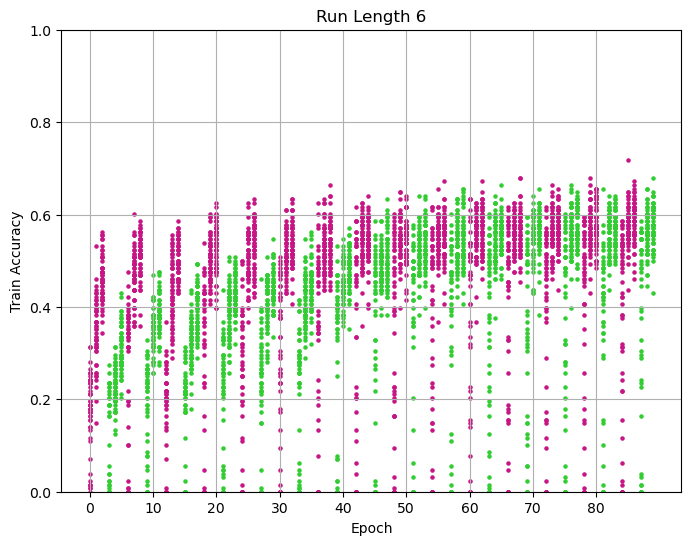

In [11]:
# Create x-axis values as index of the data list
x = range(len(accuracy_accumulative_training_batch))



def scatter_plot_2d_list(two_d_list):
    counter = 1
    plt.figure(figsize=(8,6))
    for x, sublist in enumerate(two_d_list):
        if ((counter % 6) < 4)  and ((counter % 6) > 0):
            current_task = 'mediumvioletred'
        else:
            current_task = 'limegreen'
        x_values = [x] * len(sublist)  # Generate x values for each sublist
        plt.scatter(x_values, sublist, color=current_task, s=5)  # Plot the sublist values against their indices with blue color
        counter += 1
    plt.xlabel('Epoch')
    plt.ylabel('Train Accuracy')
    plt.title('Run Length 6')
    
    plt.grid(True)
    plt.ylim((0,1))
    plt.xticks(range(0, len(two_d_list), 10))  # Set ticks at each 10th integer position
    plt.show()

# Example usage:
scatter_plot_2d_list(accuracy_accumulative_training_batch)

### 4. Test Accuracy on Val Set

#### Accuracy for task 1

In [12]:
# read test_label location
labels_path = '/Users/Limit/imagenet_annot/validation_set_labels.csv'
labels_df = pd.read_csv(labels_path)
# find the labels of only the first 10 classes
labels_df_leq_10 = labels_df[labels_df['label'] < 5]

labels_validation_images = labels_df_leq_10['label'].tolist()

In [13]:
model.eval()
# find the test images
image_path = "/Users/Limit/imagenet-object-localization-challenge_validation/val"
filenames_image_path = []
for root, _, filenames in os.walk(image_path):
    for i in filenames:
        if (i.split('.')[0] in labels_df_leq_10['ImageId'].tolist()):
            filenames_image_path.append(i)
true_label = 0    
counter = 0
correct_labels = 0
start_time = time.time()
grab_980_max_val = []
for i in range(len(filenames_image_path)):
    counter +=1
    image_name = image_path + '/' + filenames_image_path[i]
    input_image = Image.open(image_name)

    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')
    
    if (counter%100 == 0):
        print("currently at", counter, 'current time is', time.time() - start_time)
    with torch.no_grad():
        output = model(input_batch)

    # print the prediction results in this format
    print('********************************************************************************')
    print('Predicting Test Sample', counter, ':   Prediction is Correct?')
    if (torch.argmax(output[0]).item() == labels_validation_images[i]):
        print('Yes')
        correct_labels += 1
    else:
        print('No')
    prob_softmax = torch.softmax(output[0], dim = 0)
    print("first 10 classes probability:", prob_softmax[:10])
    print()
    print('max probability is', torch.max(prob_softmax, dim = 0))
    print()
    print('the max probability of the rest of 990 dim is')
    print(torch.topk(prob_softmax[10:], k=4))
    print('End*****************************************************************************')
    print()
    
    grab_980_max_val.append(torch.topk(prob_softmax[10:], k=4)[1][1:])
    # The output has unnormalized scores. To get probabilities, can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

print('the overall testing error on task 1 is')
print(correct_labels/counter)

********************************************************************************
Predicting Test Sample 1 :   Prediction is Correct?
No
first 10 classes probability: tensor([7.2106e-03, 6.8372e-04, 9.8307e-05, 2.6112e-05, 1.1446e-04, 4.4932e-02,
        2.5606e-02, 1.6789e-01, 6.7762e-01, 7.5757e-02])

max probability is torch.return_types.max(
values=tensor(0.6776),
indices=tensor(8))

the max probability of the rest of 990 dim is
torch.return_types.topk(
values=tensor([1.4360e-07, 1.3193e-07, 1.2122e-07, 1.2099e-07]),
indices=tensor([ 65, 643, 853, 214]))
End*****************************************************************************

********************************************************************************
Predicting Test Sample 2 :   Prediction is Correct?
No
first 10 classes probability: tensor([9.4381e-03, 1.2245e-03, 3.5809e-04, 6.5047e-05, 2.0506e-04, 9.4284e-02,
        5.5245e-02, 2.3259e-01, 4.0344e-01, 2.0306e-01])

max probability is torch.return_types.max(
values=

#### Accuracy for task 2

In [14]:
# read test_label location
labels_path = '/Users/Limit/imagenet_annot/validation_set_labels.csv'
labels_df = pd.read_csv(labels_path)
# find the labels of only the first 10 classes
labels_df_leq_10 = labels_df[labels_df['label'] < 10]
labels_df_leq_10 = labels_df_leq_10[labels_df_leq_10['label'] > 5]

labels_validation_images = labels_df_leq_10['label'].tolist()

In [15]:
model.eval()
# find the test images
image_path = "/Users/Limit/imagenet-object-localization-challenge_validation/val"
filenames_image_path = []
for root, _, filenames in os.walk(image_path):
    for i in filenames:
        if (i.split('.')[0] in labels_df_leq_10['ImageId'].tolist()):
            filenames_image_path.append(i)
true_label = 0    
counter = 0
correct_labels = 0
start_time = time.time()
grab_980_max_val = []
for i in range(len(filenames_image_path)):
    counter +=1
    image_name = image_path + '/' + filenames_image_path[i]
    input_image = Image.open(image_name)

    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')
    
    if (counter%100 == 0):
        print("currently at", counter, 'current time is', time.time() - start_time)
    with torch.no_grad():
        output = model(input_batch)

    # print the prediction results in this format
    print('********************************************************************************')
    print('Predicting Test Sample', counter, ':   Prediction is Correct?')
    if (torch.argmax(output[0]).item() == labels_validation_images[i]):
        print('Yes')
        correct_labels += 1
    else:
        print('No')
    prob_softmax = torch.softmax(output[0], dim = 0)
    print("first 10 classes probability:", prob_softmax[:10])
    print()
    print('max probability is', torch.max(prob_softmax, dim = 0))
    print()
    print('the max probability of the rest of 990 dim is')
    print(torch.topk(prob_softmax[10:], k=4))
    print('End*****************************************************************************')
    print()
    
    grab_980_max_val.append(torch.topk(prob_softmax[10:], k=4)[1][1:])
    # The output has unnormalized scores. To get probabilities, can run a softmax on it.
    probabilities = torch.nn.functional.softmax(output[0], dim=0)

print('the overall testing error on task 2 is')
print(correct_labels/counter)

********************************************************************************
Predicting Test Sample 1 :   Prediction is Correct?
No
first 10 classes probability: tensor([9.2969e-04, 8.2607e-05, 7.7816e-07, 4.5008e-08, 6.1984e-07, 2.6574e-03,
        1.1807e-03, 2.3305e-01, 7.1211e-01, 4.9985e-02])

max probability is torch.return_types.max(
values=tensor(0.7121),
indices=tensor(8))

the max probability of the rest of 990 dim is
torch.return_types.topk(
values=tensor([1.0429e-10, 8.5194e-11, 8.0064e-11, 7.9972e-11]),
indices=tensor([699, 643, 850,  65]))
End*****************************************************************************

********************************************************************************
Predicting Test Sample 2 :   Prediction is Correct?
No
first 10 classes probability: tensor([4.9940e-04, 5.1955e-05, 8.6803e-06, 1.5016e-06, 8.9134e-06, 1.6352e-02,
        7.6362e-03, 2.5431e-02, 1.4406e-01, 8.0595e-01])

max probability is torch.return_types.max(
values=

#### Save the weight

In [19]:
# Save the weight as the output
torch.save(model.state_dict(), 'model_weights_new_exp_9th_original.pth')